In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

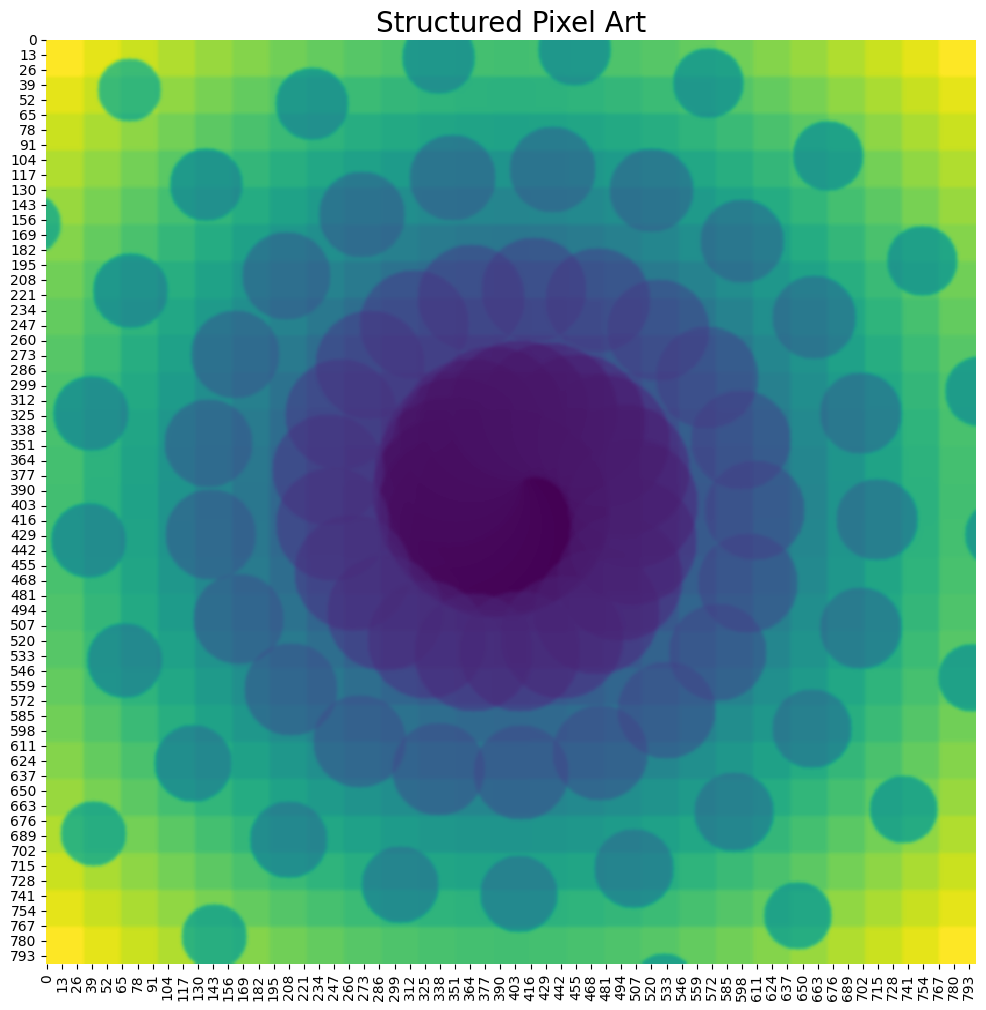

In [7]:
from scipy.ndimage import gaussian_filter

# --- 1. Setup ---
canvas_size = 800
grid_size = 25  # Slightly finer grid for more detail
square_size = canvas_size // grid_size
canvas = np.zeros((canvas_size, canvas_size))

# --- 2. Generate Structured Grid Art ---
# The color of each square is based on its distance from the center, creating a gradient.
grid_cx, grid_cy = grid_size // 2, grid_size // 2
for i in range(grid_size):
    for j in range(grid_size):
        dist_from_center = np.sqrt((i - grid_cx)**2 + (j - grid_cy)**2)
        color_value = dist_from_center * 2.5

        start_row, end_row = i * square_size, (i + 1) * square_size
        start_col, end_col = j * square_size, (j + 1) * square_size
        canvas[start_row:end_row, start_col:end_col] = color_value

# --- 3. Add a Spiral Overlay ---
# Instead of random circles, place them along a spiral for a more structured feel.
num_circles = 100
max_radius = canvas_size * 0.1
canvas_cx, canvas_cy = canvas_size // 2, canvas_size // 2

for i in range(num_circles):
    # Angle increases with each circle
    angle = i * 0.3
    # Distance from center increases with angle, creating a spiral
    distance = i * 5
    
    # Convert from polar (spiral) coordinates to cartesian
    cx = int(canvas_cx + distance * np.cos(angle))
    cy = int(canvas_cy + distance * np.sin(angle))
    
    # Radius gets smaller as we move away from the center
    radius = int(max_radius / (1 + i * 0.02))
    if radius < 2: continue

    # Find all points within the circle
    y, x = np.ogrid[:canvas_size, :canvas_size]
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2
    
    # Blend the circle's color (based on its order) with the canvas
    circle_color = i / num_circles * 20
    canvas[mask] = (canvas[mask] + circle_color) / 2

# --- 4. Post-Processing ---
# A light blur to soften the pixel edges and blend the layers
final_art = gaussian_filter(canvas, sigma=1.5)

# --- 5. Visualization ---
plt.figure(figsize=(12, 12))
sns.heatmap(final_art, cmap='viridis', cbar=False)
plt.title("Structured Pixel Art", fontsize=20)
plt.show()